# MBA em Ciência de Dados
## Técnicas Avançadas de Captura e Tratamento de Dados


### <span style="color:darkred">Módulo VII - Dados não estruturados: sinais e imagens</span>


### <span style="color:darkred">Representações digitais de dados não estruturados: imagens e sinais</span>

Material Produzido por Moacir Antonelli Ponti

CeMEAI - ICMC/USP São Carlos

---

__Conteúdo:__
1. Representações digitais de dados sequenciais e espaciais
2. Sinais e propriedades
3. Imagens e propriedades


__Referência complementar__

GONZALES, R.C.; WOODS, R.E. **Processamento Digital de Imagens**. 3.ed. 2010.

***

## Representações digitais de sinais e imagens

Possuem propriedades **sequenciais** e **espaciais**

* Sequenciais: séries temporais, sinais, etc.
* Espaciais: imagens, mapas, etc.

### Sequenciais:

> Um ponto amostrado afeta a probabilidade do próximo ponto.

Esse tipo de dado, que inclui textos quando não restringimos aos binários, não possui a caracerística i.i.d.

> (i)ndependente e (i)denticamente (d)istribuído - i.i.d.

Dados binários sequenciais incluem valores numéricos que podem ser interpretados de diversas formas.

* **Dados sequenciais**: a ordenação dos dados importa mas não necessariamente temos um domínio temporal:
    * Texto
    * Sequências de DNA
    
    
* **Séries temporais**: são aquelas em que uma informação é coletada em intervalos de tempo, regulares ou não. A frequência de aquisição pode variar desde milissegundos até dias, ou semanas
    * Dados de clima
    * Mercado de ações
    * Moedas e câmbio
    
    
* **Sinais**: são dados comumente coletado por sensores a uma taxa alta de amostragem, com muitos pontos por unidade de tempo (em geral segundos):
    * Músicas
    * Fala
    * Acelerometria e dados inerciais

### Espaciais

Esse tipo de dado comumente também não é i.i.d., mas aqui há uma dependência em termos de uma vizinhança, comumente definida em uma grade regular.

**Imagens** são a manifestação mais comum desse tipo de dados, como:
* Fotografias
* Clip-art / vetorial 2D
* Arte-vetorial 3D
* Desenhos

Também são coletados e armazenados dados em grade regular para outras aplicações como mapas e superfícies.

---
## <font color="blue">Sinais</font>

São comumente representados como uma função matemática $f(x)$, em que $x$ pode representar o tempo em que um determinado valor $f(x)$ foi observado.

O conceito de **resolução** é importante aqui, pois define quantos pontos foram amostrados em uma certa unidade de tempo.

Em termos de sinais isso está relacionado à *frequência* de aquisição comumente medida em Hz (ciclos por segundo).

Assim, um sinal amostrado a 100 Hz possui 100 pontos para cada segundo



In [1]:
import numpy as np
import matplotlib.pyplot as plt

# define amostragem ao longo do tempo
F = 10
# define os segundos
secs = 1
# prepara o eixo real onde iremos amostrar a funcao
x = np.arange(0, secs, (1/F))
print(x)

# computa a funcao
f_x = 0.5 + 0.1*x + x**2 
f_x

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


array([0.5 , 0.52, 0.56, 0.62, 0.7 , 0.8 , 0.92, 1.06, 1.22, 1.4 ])

Text(0.5, 1.0, 'Pontos: 10 - interpolados')

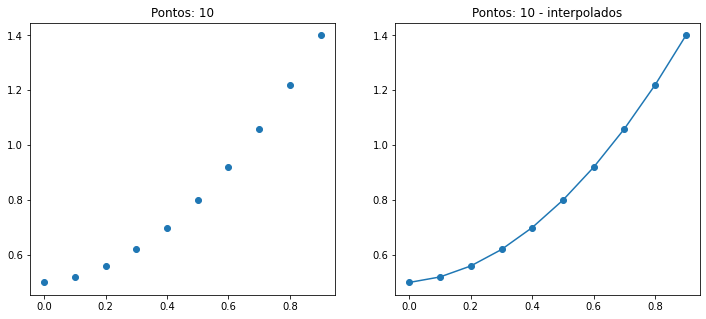

In [3]:
# exibe a funcao num gráfico
plt.figure(figsize=(12,5))
plt.subplot(121); plt.plot(x, f_x, 'o')
plt.title("Pontos: %d" % x.shape)
plt.subplot(122); plt.plot(x, f_x, 'o-')
plt.title("Pontos: %d - interpolados" % x.shape)

---
Vemos então que a **representação digital de sinais ou sequencias** de dados é feita na forma vetorial, com uma sequência de valores numéricos.

Seguindo essa ideia podemos representar diferentes padrões de variação sequencial.

Text(0.5, 1.0, 'Pontos: 100')

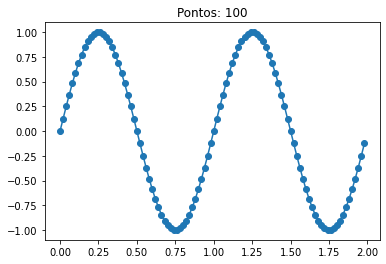

In [10]:
# define amostragem ao longo do tempo
F = 50
# define os segundos
secs = 2
# prepara o eixo real onde iremos amostrar a funcao
x = np.arange(0, secs, (1/F))

# computa a funcao
f_sin = np.sin(x * 2 * np.pi)

plt.plot(x, f_sin, 'o-')
plt.title("Pontos: %d" % x.shape)

Text(0.5, 1.0, 'Pontos: 500')

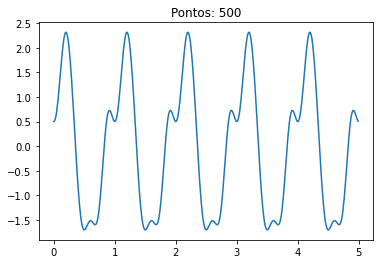

In [11]:
# define amostragem ao longo do tempo
F = 100
# define os segundos
secs = 5
# prepara o eixo real onde iremos amostrar a funcao
t = np.arange(0, secs, (1/F))

# combinacao de senos e cossenos
f =  1.6*(np.sin(t*2*np.pi)**3) + 1.3*np.cos(t*2*np.pi) - 0.5*np.cos(2*t*2*np.pi) - 0.2*np.cos(3*t*2*np.pi) - 0.1*np.cos(4*t*2*np.pi)

plt.plot(t, f)
plt.title("Pontos: %d" % f.shape)

Text(0.5, 1.0, 'Pontos: 400')

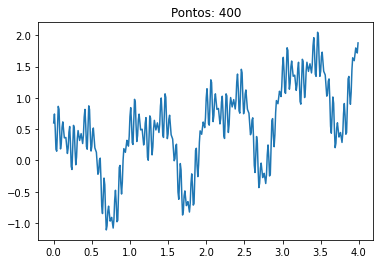

In [17]:
# define amostragem ao longo do tempo
F = 100
# define os segundos
secs = 4
# prepara o eixo real onde iremos amostrar a funcao
x = np.arange(0, secs, (1/F))

# computa a funcao
f_com = 0.2*np.sin(x * 2 * np.pi*20) + 0.2*np.cos(x * 2 * np.pi * 15) + 0.4*np.cos(x * 2 * np.pi*2) + 0.6*np.sin(x * 2 * np.pi) + 0.1*x**2 

plt.plot(x, f_com)
plt.title("Pontos: %d" % x.shape)


Text(0.5, 1.0, 'Pontos: 400')

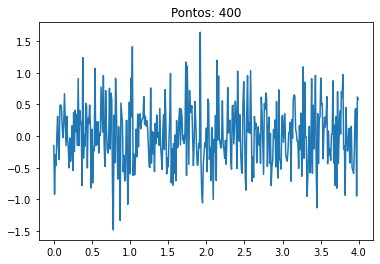

In [18]:
f_rnd = np.random.randn(x.shape[0])*0.5
plt.plot(x, f_rnd)
plt.title("Pontos: %d" % x.shape)

Para comparar uma sequência de dados que possui dependência temporal : f_com com uma que não possui : f_rnd, podemos verificar a correlação entre o ponto atual e o próximo

**autocorrelação** de sequências de tamanhos variados,
com $k=1,...n$

$$R(k) = \frac{1}{n} \sum_i x_i x_{i+k}$$

Text(0.5, 1.0, 'AC rnd = 0.147')

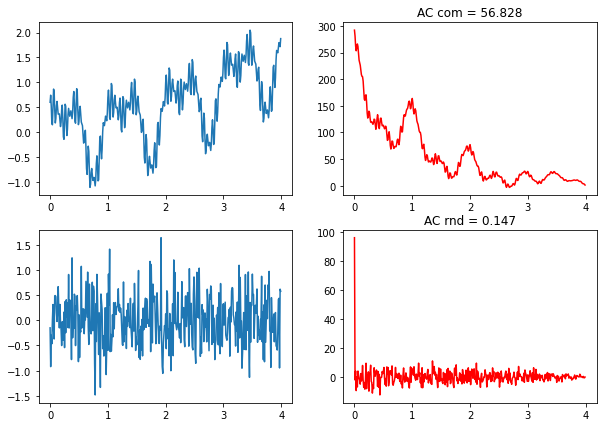

In [19]:
def autocorrelation(f):
    ac = np.correlate(f, f, mode='full')
    return ac[ac.size // 2:]


AC_f_com = autocorrelation(f_com)
AC_f_rnd = autocorrelation(f_rnd)

plt.figure(figsize=(10,7))
plt.subplot(221)
plt.plot(x, f_com)
plt.subplot(222)
plt.plot(x, AC_f_com, '-r')
plt.title("AC com = %.3f" % (np.mean(AC_f_com)))

plt.subplot(223)
plt.plot(x, f_rnd)
plt.subplot(224)
plt.plot(x, AC_f_rnd, '-r')
plt.title("AC rnd = %.3f" % (np.mean(AC_f_rnd)))



---
## <font color="blue">Imagens</font>

São comumente representados como uma função matemática $f(x,y)$, em que $x,y$ representam coordenadas espaciais onde $f(x,y)$ foi observado.

O conceito de **resolução** espacial, define quantos pontos foram amostrados em uma certo espaço planar.

Em imagens é comum falar-se em:
* pixels (ou megapixels), representando o valor absoluto dos pontos
* pontos por polegada, representando quantos pixels por polegada (unidade que equivale a $\approx 2.5$ cm) foram capturados
* pixels por centímetro quadrado

Resolução = 240 x 360 = 86400


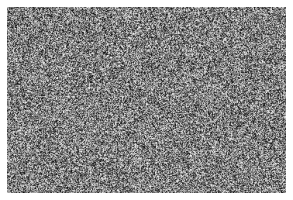

In [20]:
# tamanho (resolucao) da imagem
n = 240
m = 360

# criando uma imagem aleatória com valores entre 0 e 255
f_rnd = np.random.randint(0,256,[n,m])

plt.figure(figsize=(5,5))
plt.imshow(f_rnd, cmap="gray")
plt.axis('off')
print("Resolução = %d x %d = %d" % (n,m, n*m))

In [21]:
f_rnd[1,2]

180

In [22]:
np.max(f_rnd)

255

In [25]:
n = 32
m = 32
x = np.arange(n)/n
y = np.arange(m)/m

x.shape = (n,1) # cria vetor coluna
y.shape = (1,m) # cria vetor linha

In [26]:
# cria matriz multiplicando os vetores x.y
f_xy = x.dot(y)

(-0.5, 31.5, 31.5, -0.5)

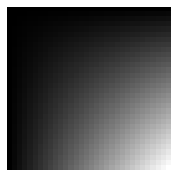

In [27]:
plt.figure(figsize=(3,3))
plt.imshow(f_xy, cmap="gray")
plt.axis('off')

In [29]:
f_xy[31,31]

0.9384765625

In [30]:
np.max(f_xy)

0.9384765625

In [32]:
len(np.unique(f_xy))

340

Notamos que os valores dessa matriz estão aproximadamente entre 0 e 1, organizados de forma **espacial** nas coordenadas $(x,y)$

* primeira imagem: valores não estão correlacioandos
* segunda imagem: há relação entre os valores nas direções $x$ e $y$

---
Em imagens de tons de cinza, temos uma representação de **1 byte por pixel**

Assim, o monitor sempre exibirá 256 tons de cinza distintos.

A segunda matriz que exibimos possui mais valores, porém foi normalizada de forma a exibir valores entre 0 (preto) e 255 (branco).


In [33]:
f_xy_uint = (f_xy*255).astype(np.uint8)
f_xy_uint[1:5,1:5]

array([[0, 0, 0, 0],
       [0, 0, 1, 1],
       [0, 1, 2, 2],
       [0, 1, 2, 3]], dtype=uint8)

In [34]:
f_xy[1:5,1:5]

array([[0.00097656, 0.00195312, 0.00292969, 0.00390625],
       [0.00195312, 0.00390625, 0.00585938, 0.0078125 ],
       [0.00292969, 0.00585938, 0.00878906, 0.01171875],
       [0.00390625, 0.0078125 , 0.01171875, 0.015625  ]])

Valores únicos float =  340
Valores únicos uint8 =  179


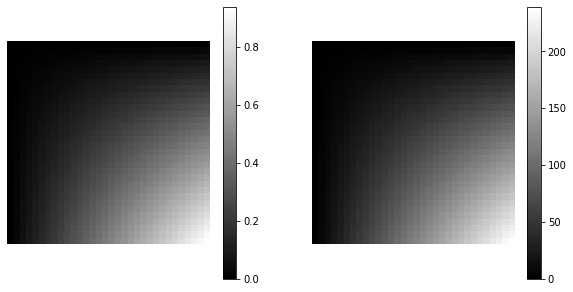

In [35]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(f_xy, cmap="gray"); plt.colorbar()
plt.axis('off')
plt.subplot(122)
plt.imshow(f_xy_uint, cmap="gray"); plt.colorbar()
plt.axis('off')

print("Valores únicos float = ",np.shape(np.unique(f_xy))[0])
print("Valores únicos uint8 = ",np.shape(np.unique(f_xy_uint))[0])

---
Imagens coloridas são comumente representadas por 3 matrizes:
* R - vermelho
* G - verde
* B - azul

vamos usar 3 matrizes para combinar as cores-luz primária R, G e B:

In [36]:
n = 32
m = 32
f_R = np.zeros([n,m]).astype(np.uint8)
f_G = np.zeros([n,m]).astype(np.uint8)
f_B = np.zeros([n,m]).astype(np.uint8)

n2 = n//2
m2 = m//2
f_R[:n2+2,:m2+2] = 255
f_G[n2-2:,:m2+2] = 255
f_B[n2-8:-8,m2-2:] = 255

f_col = np.empty([n,m,3]).astype(np.uint8)
f_col[:,:,0] = f_R
f_col[:,:,1] = f_G
f_col[:,:,2] = f_B

Text(0.5, 1.0, 'B')

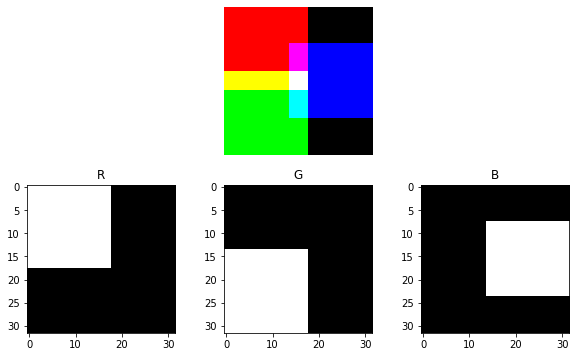

In [37]:
plt.figure(figsize=(10,6))
plt.subplot(232)
plt.imshow(f_col)
plt.axis('off')
plt.subplot(234); 
plt.imshow(f_R, cmap="gray", vmin=0, vmax=255); plt.title('R')
plt.subplot(235); 
plt.imshow(f_G, cmap="gray", vmin=0, vmax=255); plt.title('G')
plt.subplot(236); 
plt.imshow(f_B, cmap="gray", vmin=0, vmax=255); plt.title('B')

---
Assim, cada pixel é representado por 8 x 3 bits = 24 bits, sendo possível codificar
$2^{24} \approx 16$ milhões de cores

In [38]:
2**24

16777216

### Resumo:

* Dados não estruturados sequenciais
    * medidas tomadas em sequência, em que comumente uma medida influencia a probabilidade da próxima
    * comumente representados por séries temporais ou sinais

* Dados não estruturados espaciais
    * a dependência agora pode existir espacialmente em duas direções
    * os dados podem ser de qualquer tipo
    * mas para visualização imagens em tons de cinza (1 byte/pixel) ou RGB coloridas (3 bytes/pixel)